In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [4]:
corr = df_train.corr()
corr.sort_values(["SalePrice"],ascending=False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [5]:
categorical_features = df_train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [6]:
numerical_features = df_train.select_dtypes(exclude = ['object']).columns
numerical_features = numerical_features.drop("SalePrice")

In [7]:
num_train = df_train[numerical_features]
cat_train = df_train[categorical_features]

In [13]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# 文字列をラベル化
for i in range(df_train.shape[1]):
    if df_train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(df_train.iloc[:,i].values) + list(df_test.iloc[:,i].values))
        df_train.iloc[:,i] = lbl.transform(list(df_train.iloc[:,i].values))
        df_test.iloc[:,i] = lbl.transform(list(df_test.iloc[:,i].values))

In [25]:
df_train.shape
df_test.shape

(1459, 80)

In [26]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [27]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [28]:
train_ID = df_train['Id']
test_ID = df_test['Id']

y = df_train['SalePrice']
X = df_train.drop(['Id','SalePrice'],axis=1)
X_test = df_test.drop('Id',axis = 1)

X_train = pd.concat([X,X_test])
X_train = X_train.drop(['LotFrontage','MasVnrArea','GarageYrBlt'],axis=1)
X_train = X_train.fillna(X_train.median())


In [29]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

Series([], dtype: int64)

In [31]:
X_train["TotalSF"] = X_train["TotalBsmtSF"] + X_train["1stFlrSF"] + X_train["2ndFlrSF"]

C:\Users\Arisa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


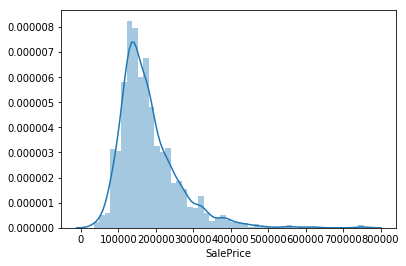

In [33]:
#正規分布に従うかの判断
sns.distplot(y)
plt.show()

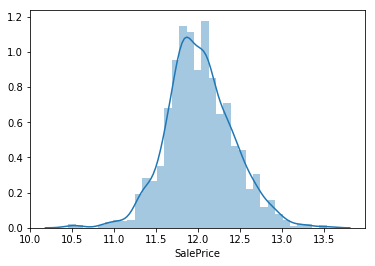

In [34]:
#数字のばらつき、偏りを小さくするために対数計算する
y = np.log(y)
sns.distplot(y)
plt.show()

In [36]:
#ランダムフォレストで特徴量の重要度を調査
train_x = X_train.iloc[:df_train.shape[0],:]
X_test = X_train.iloc[df_train.shape[0]:,:]

Training done using Random Forest


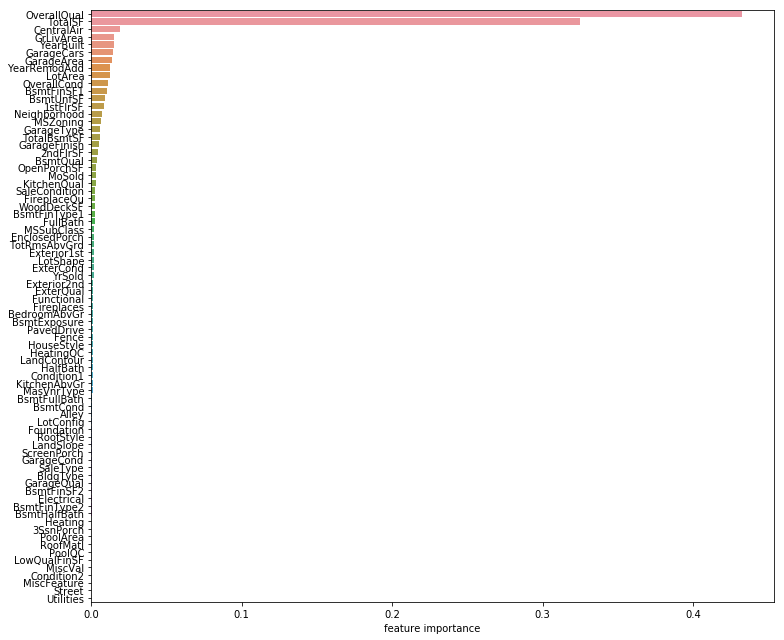

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(train_x,y)
print("Training done using Random Forest")
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [38]:
x_train = train_x.iloc[:,ranking[:30]]
X_test = X_test.iloc[:,ranking[:30]]

In [43]:
#標準化
x_train = (x_train-x_train.mean()) / x_train.std()
X_test = (X_test-X_test.mean()) / X_test.std()

In [55]:
x = x_train
x['SalePrice'] = y

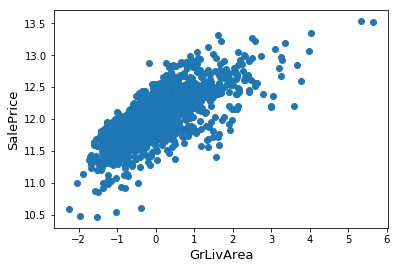

In [56]:
ig, ax = plt.subplots()
ax.scatter(x = x['GrLivArea'], y = x['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [68]:
x = x.drop(x[(x['GrLivArea']>5) & (x['SalePrice']>13)].index)

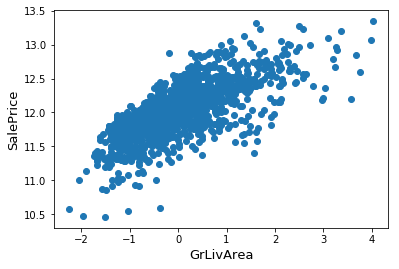

In [69]:
ig, ax = plt.subplots()
ax.scatter(x = x['GrLivArea'], y = x['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

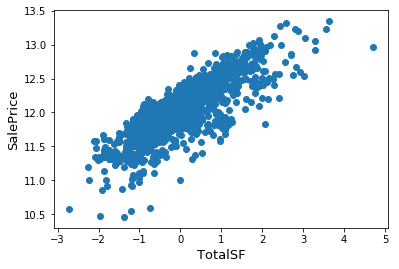

In [70]:
ig, ax = plt.subplots()
ax.scatter(x = x['TotalSF'], y = x['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalSF', fontsize=13)
plt.show()

In [77]:
x = x.drop(x[(x['TotalSF']>4) & (x['SalePrice']>12.5)].index)

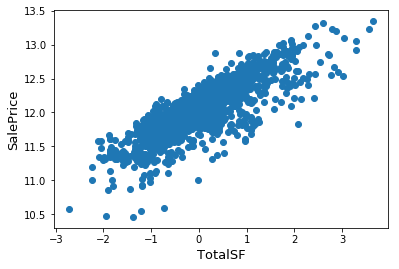

In [78]:
ig, ax = plt.subplots()
ax.scatter(x = x['TotalSF'], y = x['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalSF', fontsize=13)
plt.show()

In [82]:
from sklearn.linear_model import LinearRegression
Y_train = x['SalePrice']
X_Xtrain = x.drop(['SalePrice'],axis=1)
slr = LinearRegression()
slr.fit(X_Xtrain,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
y_test_pred = np.exp(slr.predict(X_test))
y_test_pred

array([124067.36116257, 166701.90641751, 184127.51816697, ...,
       160519.4189489 , 116452.42329625, 237451.75072971])

In [84]:
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_test_pred
})
submission.to_csv('submission.csv', index=False)

In [89]:
x.columns

Index(['OverallQual', 'TotalSF', 'CentralAir', 'GrLivArea', 'YearBuilt',
       'GarageCars', 'GarageArea', 'YearRemodAdd', 'LotArea', 'OverallCond',
       'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'Neighborhood', 'MSZoning',
       'GarageType', 'TotalBsmtSF', 'GarageFinish', '2ndFlrSF', 'BsmtQual',
       'OpenPorchSF', 'MoSold', 'KitchenQual', 'SaleCondition', 'FireplaceQu',
       'WoodDeckSF', 'BsmtFinType1', 'FullBath', 'MSSubClass', 'EnclosedPorch',
       'SalePrice'],
      dtype='object')

In [90]:
del x['1stFlrSF']
del x['2ndFlrSF']

In [91]:
from sklearn.linear_model import LinearRegression
Y_train = x['SalePrice']
X_Xtrain = x.drop(['SalePrice'],axis=1)
slr = LinearRegression()
slr.fit(X_Xtrain,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
X_test = X_test.drop(['1stFlrSF','2ndFlrSF'],axis=1)
y_test_pred = np.exp(slr.predict(X_test))

In [95]:
y_test_pred

array([124016.37120479, 166929.88953911, 184196.82032681, ...,
       160743.61156719, 116157.59116451, 237735.65853956])

In [96]:
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_test_pred
})
submission.to_csv('submission1.csv', index=False)